<div style="background-color:#ddffcc; padding:10px;">

<div style="text-align: center"><h1> Diabetes prediction <h1>
  


<div style="background-color:#ddffcc; padding:10px;">

<span style="font-size:24px; font-weight:bold;">Introduction </span> <br>
Diabetes is a chronic disease that affects millions of people worldwide. Early detection is crucial to prevent complications and manage the disease effectively. In this project, we will be building a machine learning model that can predict whether a person has diabetes based on several features such as age, gender, hypertension, heart disease, smoking history, BMI, HbA1c level, and blood glucose level.
</div>

<div style="background-color:#ddffcc; padding:10px;">
<span style="font-size:24px; font-weight:bold;">About Dataset </span> <br>
The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. 
    This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. 

<div style="background-color:#ddffcc; padding:10px;">
<span style="font-size:24px; font-weight:bold;">Feature explanation </span> <br>
    
**age** - Age is an important factor as diabetes is more commonly diagnosed in older adults.Age ranges from 0-80 in our dataset. <br> 
    
**gender** - Gender refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes.<br>
    
**body mass index (BMI)** -BMI (Body Mass Index) is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk of diabetes. The range of BMI in the dataset is from 10.16 to 71.55. BMI less than 18.5 is underweight, 18.5-24.9 is normal, 25-29.9 is overweight, and 30 or more is obese. <br>
    
**hypertension** - Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated. It has values a 0 or 1 where 0 indicates they don’t have hypertension and for 1 it means they have hypertension.<br>
    
**heart disease** - Heart disease is another medical condition that is associated with an increased risk of developing diabetes. It has values a 0 or 1 where 0 indicates they don’t have heart disease and for 1 it means they have heart disease. <br>
    
**smoking history** - Smoking history is also considered a risk factor for diabetes and can exacerbate the complications associated with diabetes.In our dataset we have 5 categories i.e not current,former,No Info,current,never and ever. <br>
    
**HbA1c level** - HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months. Higher levels indicate a greater risk of developing diabetes. Mostly more than 6.5% of HbA1c Level indicates diabetes. <br>
    

**blood glucose level**  - Blood glucose level refers to the amount of glucose in the bloodstream at a given time. High blood glucose levels are a key indicator of diabetes.

  

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")


import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from IPython.display import Image


import warnings
warnings.filterwarnings("ignore")



In [3]:
df=pd.read_csv(r'C:\Users\DannyC19\Desktop\Python\Classification\diabetes_prediction_dataset.csv')
print(df.shape)
df.head()

(100000, 9)


gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [17]:

df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [18]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [4]:
#Count the number of each category in gender
male_count = (df['gender']=='Male').sum()
female_count = (df['gender']=='Female').sum()
other_count = (df['gender']=='Other').sum()

print("Male count:", male_count, "Female count:", female_count, "Other count:", other_count)

Male count: 41430 Female count: 58552 Other count: 18


In [5]:
#clean the other class from gender feature
df=df[df['gender']!='Other']
df.shape

(99982, 9)

In [6]:
# Are there duplicate rows?
duplicated_sum = df.duplicated().sum()
print(f"No of Duplicate rows: {duplicated_sum} ")

#Clean duplicated rows
df=df.drop_duplicates()
df.shape

No of Duplicate rows: 3854 


(96128, 9)

In [22]:
df.columns


Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [24]:
blood_glucose_uniqe=df['blood_glucose_level'].unique()
blood_glucose_uniqe

array([140,  80, 158, 155,  85, 200, 145, 100, 130, 160, 126, 159,  90,
       260, 220, 300, 280, 240], dtype=int64)

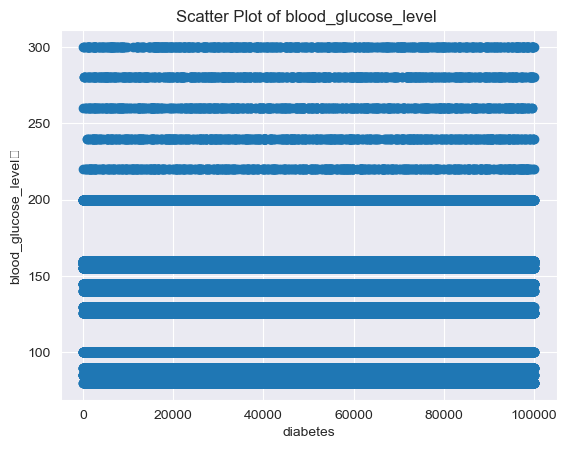

In [25]:
plt.scatter(df.index, df['blood_glucose_level'])
plt.xlabel('diabetes')
plt.ylabel('blood_glucose_level	')
plt.title('Scatter Plot of blood_glucose_level ')
plt.show()
# In blood glucose levels the values are not outlyers - there are 18 categories of values. 

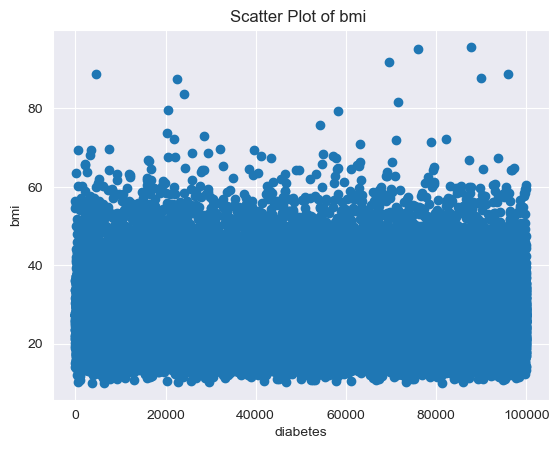

In [26]:
plt.scatter(df.index, df['bmi'])
plt.xlabel('diabetes')
plt.ylabel('bmi')
plt.title('Scatter Plot of bmi ')
plt.show()

In [27]:
print ((df['bmi']>80).value_counts())
# there are 9 values of bmi >80 (very obesed)
df[df['bmi']>80]

False    96119
True         9
Name: bmi, dtype: int64


gender   age  hypertension  heart_disease smoking_history    bmi  \
4551   Female  45.0             0              0           never  88.72   
22454    Male  19.0             0              0         No Info  87.51   
24186    Male  49.0             0              0          former  83.74   
69549    Male  38.0             0              0           never  91.82   
71485  Female  48.0             0              0           never  81.73   
76093    Male  16.0             0              0         No Info  95.22   
87843    Male   7.0             0              0         No Info  95.69   
90043  Female  34.0             0              0         No Info  87.70   
96066    Male  80.0             0              0           never  88.76   

       HbA1c_level  blood_glucose_level  diabetes  
4551           7.0                  300         1  
22454          3.5                   85         0  
24186          6.8                  155         1  
69549          6.0                  160         0  
71485          6.5                  130         1  
76093          4.5                   90         0  
87843          6.1                  130         0  
90043          6.0                  126         0  
96066          6.2                  140         0

In [28]:
df['diabetes'].value_counts()
# The data is imbalanced

0    87646
1     8482
Name: diabetes, dtype: int64

## Visualizations

In [ ]:
#What about smokers?

In [7]:
df

gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99994  Female  36.0             0              0         No Info  24.60   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140         0  
1              6.6                   80         0  
2              5.7                  158         0  
3              5.0                  155         0  
4              4.8                  155         0  
...            ...                  ...       ...  
99994          4.8                  145         0  
99996          6.5                  100         0  
99997          5.7                  155         0  
99998          4.0                  100         0  
99999          6.6                   90         0  

[96128 rows x 9 columns]

In [9]:
df['smoking_history'] = df['smoking_history'].replace(['former', 'current', 'not current', 'ever'], 'smoker')
df['smoking_history'].value_counts()

never      34395
No Info    32881
smoker     28852
Name: smoking_history, dtype: int64

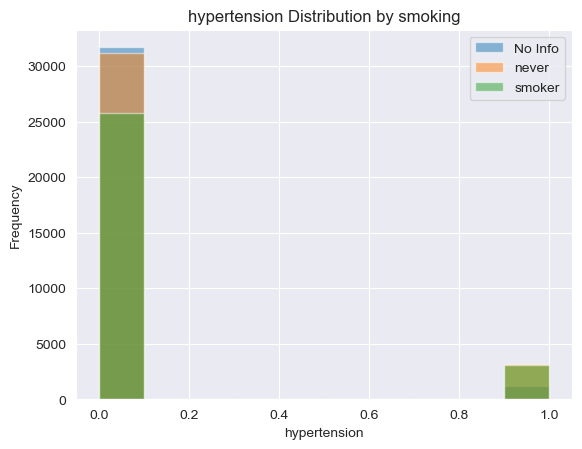

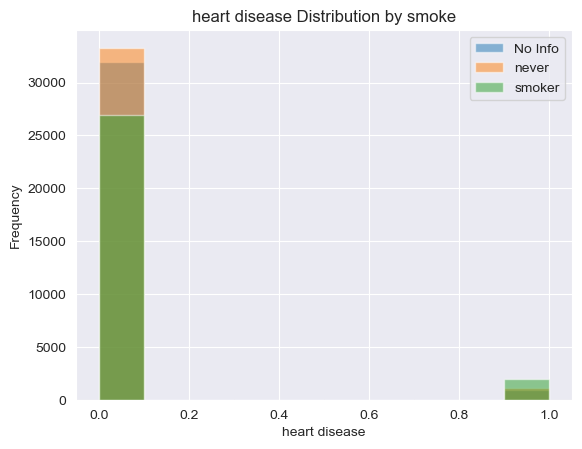

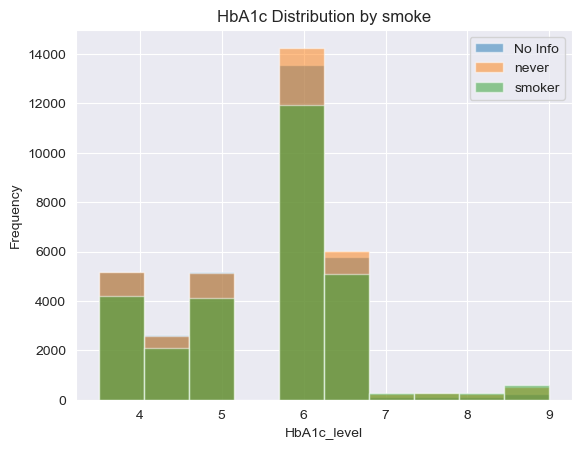

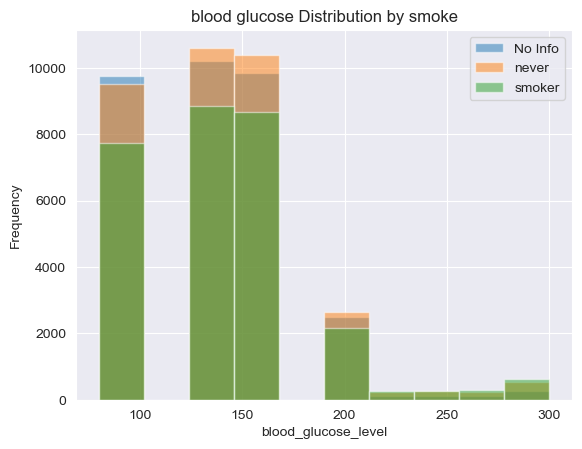

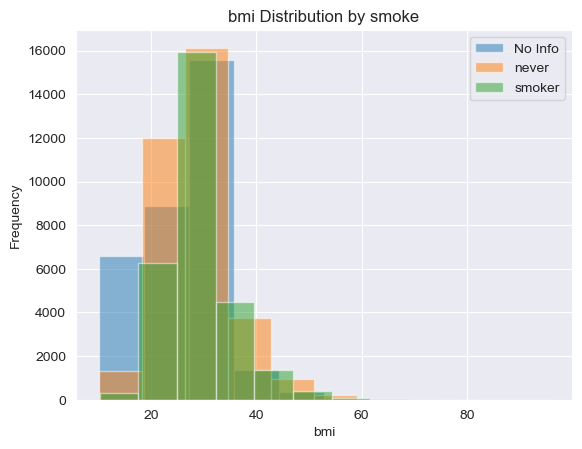

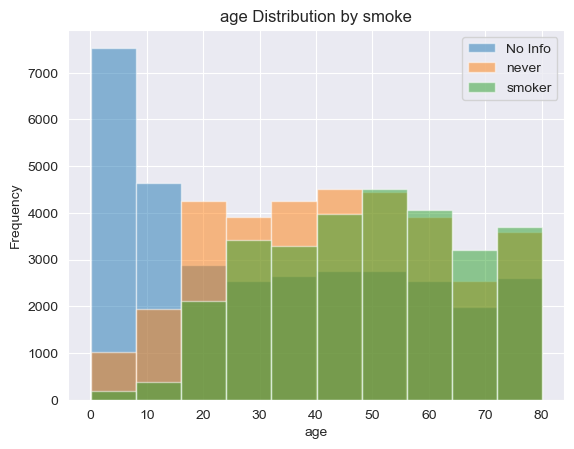

In [11]:

#What about smokers?
# Groupby the dataframe by 'gender'
grouped_df = df.groupby('smoking_history')

# Create a single plot
fig, ax = plt.subplots()

# Iterate over each group and plot histograms
for smoke, group in grouped_df:
    # Plot histogram on the same plot
    ax.hist(group['hypertension'], label=smoke, alpha=0.5)

# Customize the plot
ax.set_xlabel('hypertension')
ax.set_ylabel('Frequency')
ax.set_title('hypertension Distribution by smoking')
ax.legend()

# Show the plot
plt.show()

# Create a single plot
fig, ax = plt.subplots()

# Iterate over each group and plot histograms
for smoke, group in grouped_df:
    # Plot histogram on the same plot
    ax.hist(group['heart_disease'], label=smoke, alpha=0.5)

# Customize the plot
ax.set_xlabel('heart disease')
ax.set_ylabel('Frequency')
ax.set_title('heart disease Distribution by smoke')
ax.legend()

# Show the plot
plt.show()



# Create a single plot
fig, ax = plt.subplots()

# Iterate over each group and plot histograms
for smoke, group in grouped_df:
    # Plot histogram on the same plot
    ax.hist(group['HbA1c_level'], label=smoke, alpha=0.5)

# Customize the plot
ax.set_xlabel('HbA1c_level')
ax.set_ylabel('Frequency')
ax.set_title('HbA1c Distribution by smoke')
ax.legend()

# Show the plot
plt.show()


# Create a single plot
fig, ax = plt.subplots()

# Iterate over each group and plot histograms
for smoke, group in grouped_df:
    # Plot histogram on the same plot
    ax.hist(group['blood_glucose_level'], label=smoke, alpha=0.5)

# Customize the plot
ax.set_xlabel('blood_glucose_level')
ax.set_ylabel('Frequency')
ax.set_title('blood glucose Distribution by smoke')
ax.legend()

# Show the plot
plt.show()

# Create a single plot
fig, ax = plt.subplots()

# Iterate over each group and plot histograms
for smoke, group in grouped_df:
    # Plot histogram on the same plot
    ax.hist(group['bmi'], label=smoke, alpha=0.5)

# Customize the plot
ax.set_xlabel('bmi')
ax.set_ylabel('Frequency')
ax.set_title('bmi Distribution by smoke')
ax.legend()

# Show the plot
plt.show()
# Create a single plot
fig, ax = plt.subplots()

# Iterate over each group and plot histograms
for smoke, group in grouped_df:
    # Plot histogram on the same plot
    ax.hist(group['age'], label=smoke, alpha=0.5)

# Customize the plot
ax.set_xlabel('age')
ax.set_ylabel('Frequency')
ax.set_title('age Distribution by smoke')
ax.legend()

# Show the plot
plt.show()



In [12]:
df.smoking_history.value_counts()


#There is a big portion of in info smokers in yiang ages
filtered_df = df[(df['age'] < 12) & (df['smoking_history'] == 'No Info')]
filtered_df.shape


new_df = df.copy()
new_df.loc[new_df['age'] < 12, 'smoking_history'] = 'never'
new_df.smoking_history.value_counts()

never      44080
smoker     28568
No Info    23480
Name: smoking_history, dtype: int64

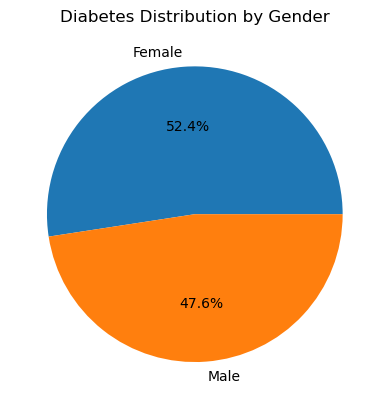

In [58]:
# Is the % of diabetes higher in male or female?

# count the number of males and females with diabetes
diabetes_counts = df[df['diabetes'] == 1]['gender'].value_counts()

# create a pie plot
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%')
plt.title('Diabetes Distribution by Gender')
plt.show()

In [32]:
# How bmi, glucose in blood and hemoglobin distibute ?

fig = make_subplots(rows=1, cols=3)

fig.add_trace(
    go.Box(y=df['bmi'], name='BMI'),
    row=1, col=1
)

fig.add_trace(
    go.Box(y=df['HbA1c_level'], name='HbA1c Level'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=df['blood_glucose_level'], name='Blood Glucose Level'),
    row=1, col=3
)

fig.update_layout(title='Box Plots for BMI, HbA1c Level, and Blood Glucose Level')
fig.show()

In [34]:
df['smoking_history'].value_counts()

never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: smoking_history, dtype: int64